In [1]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [3]:
ds = xr.open_dataset('.\\slp.nc')
ds_temp = xr.open_dataset('.\\t2m.nc')

c:\Users\chint\AppData\Local\Programs\Python\Python312\Lib\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\chint\AppData\Local\Programs\Python\Python312\Lib\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


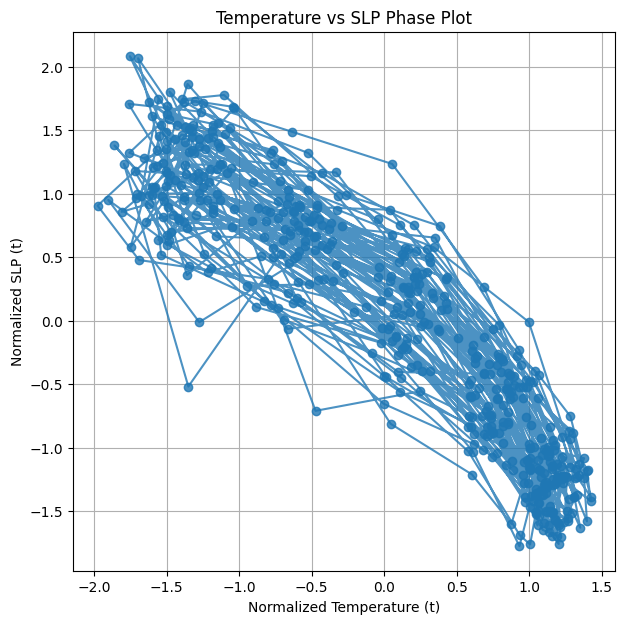

In [4]:
monthly_mean_temp = ds_temp.t2m.resample(time='1M').mean()
monthly_mean_slp = ds.msl.resample(time='1M').mean()

# Step 2: Spatial average over latitude & longitude
temp_avg = monthly_mean_temp.mean(dim=['latitude', 'longitude']).values
slp_avg = monthly_mean_slp.mean(dim=['latitude', 'longitude']).values

# Step 3: Normalize both
temp_norm = (temp_avg - np.mean(temp_avg)) / np.std(temp_avg)
slp_norm = (slp_avg - np.mean(slp_avg)) / np.std(slp_avg)

# Step 4: Plot Temperature vs SLP Phase Plot
plt.figure(figsize=(7,7))
plt.plot(temp_norm, slp_norm, linestyle='-', marker='o', alpha=0.8)
plt.xlabel('Normalized Temperature (t)')
plt.ylabel('Normalized SLP (t)')
plt.title('Temperature vs SLP Phase Plot')
plt.grid()
plt.show()

c:\Users\chint\AppData\Local\Programs\Python\Python312\Lib\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\chint\AppData\Local\Programs\Python\Python312\Lib\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


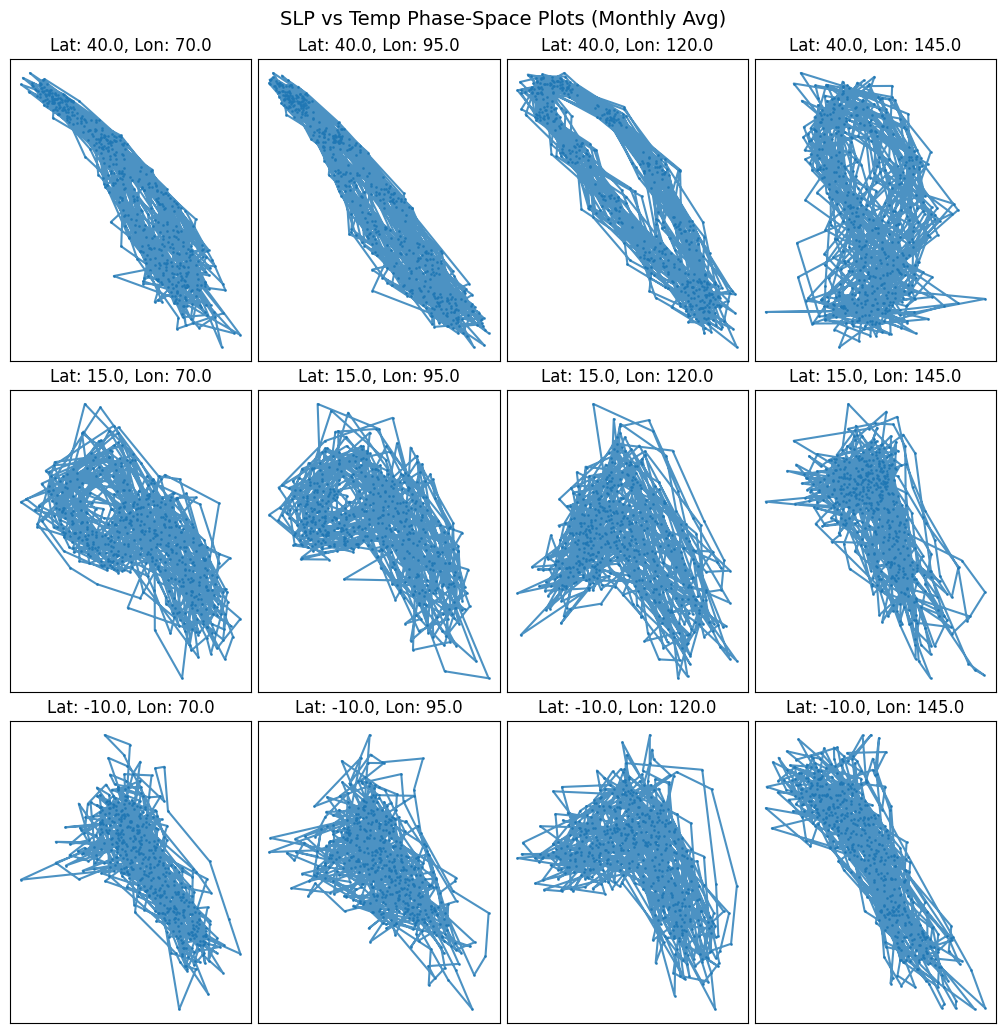

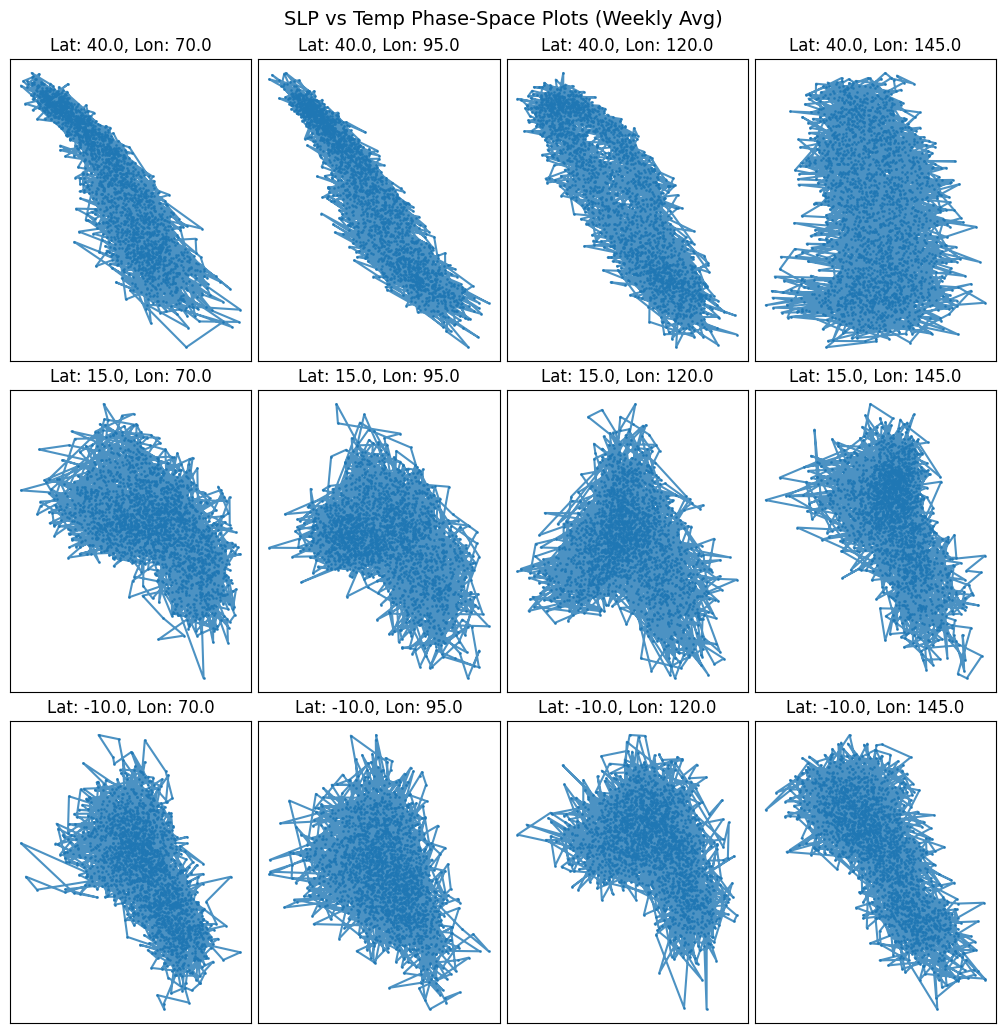

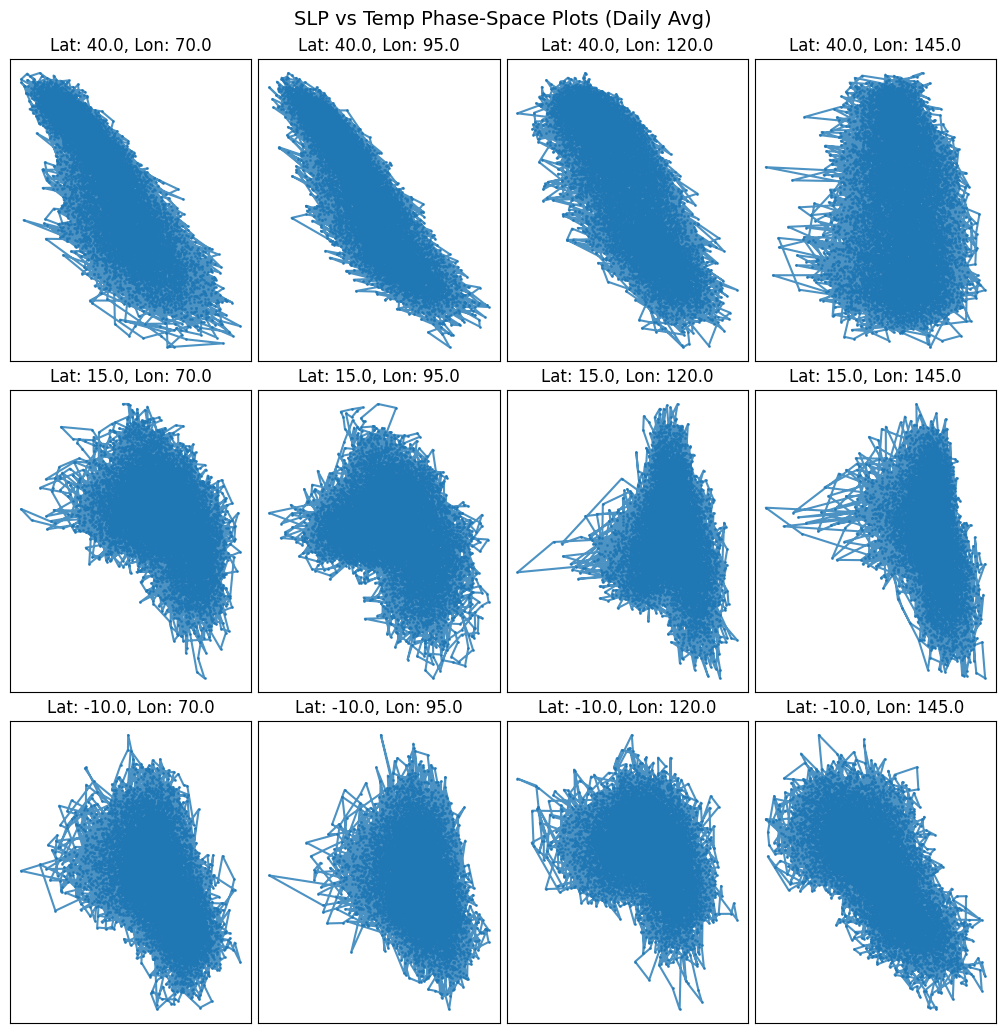

In [5]:
lat_vals = ds.latitude.values
lon_vals = ds.longitude.values
selected_lats = lat_vals[::50]  # Select every 50th latitude
selected_lons = lon_vals[::50]  # Select every 50th longitude

# Temporal scales
temporal_scales = {
    "Monthly": (
        ds.msl.resample(time="1M").mean().dropna(dim='time'),
        ds_temp.t2m.resample(time="1M").mean().dropna(dim='time')
    ),
    "Weekly": (
        ds.msl.resample(time="1W").mean().dropna(dim='time'),
        ds_temp.t2m.resample(time="1W").mean().dropna(dim='time')
    ),
    "Daily": (
        ds.msl.dropna(dim='time'),
        ds_temp.t2m.dropna(dim='time')
    )
}

# Create phase-space plots for each temporal scale
for scale_name, (scale_data_slp, scale_data_temp) in temporal_scales.items():
    fig, axs = plt.subplots(len(selected_lats), len(selected_lons), figsize=(10, 10))
    
    for i, lat in enumerate(selected_lats):
        for j, lon in enumerate(selected_lons):
            # Extract SLP and Temp time series at (lat, lon)
            point_slp = scale_data_slp.sel(latitude=lat, longitude=lon, method="nearest").values
            point_temp = scale_data_temp.sel(latitude=lat, longitude=lon, method="nearest").values
            
            # Normalize (NO detrending)
            norm_slp = (point_slp - np.mean(point_slp)) / np.std(point_slp)
            norm_temp = (point_temp - np.mean(point_temp)) / np.std(point_temp)
            
            # Plot SLP vs Temp
            axs[i, j].plot(norm_slp, norm_temp, linestyle="-", marker=".", markersize=2, alpha=0.8)
            axs[i, j].set_title(f"Lat: {lat:.1f}, Lon: {lon:.1f}")
            axs[i, j].set_xticks([])
            axs[i, j].set_yticks([])

    # Adjust layout
    plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Reduce space
    plt.tight_layout(pad=0.5)  # Adjust padding
    plt.suptitle(f"SLP vs Temp Phase-Space Plots ({scale_name} Avg)", fontsize=14, y=1.02)
    plt.show()

c:\Users\chint\AppData\Local\Programs\Python\Python312\Lib\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\chint\AppData\Local\Programs\Python\Python312\Lib\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


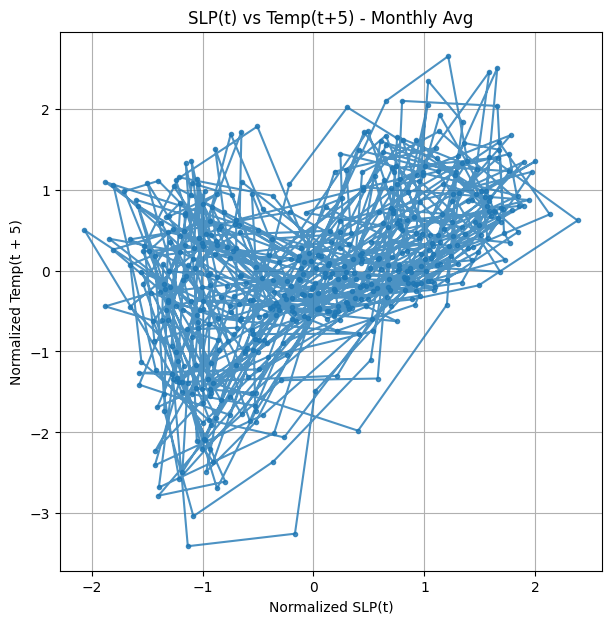

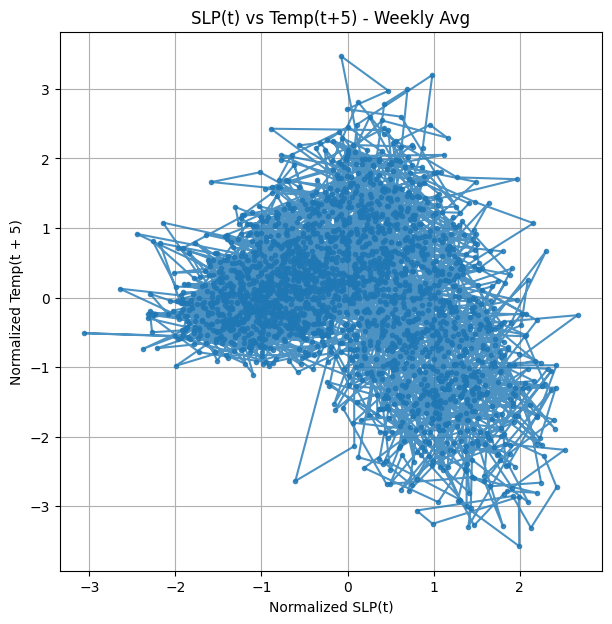

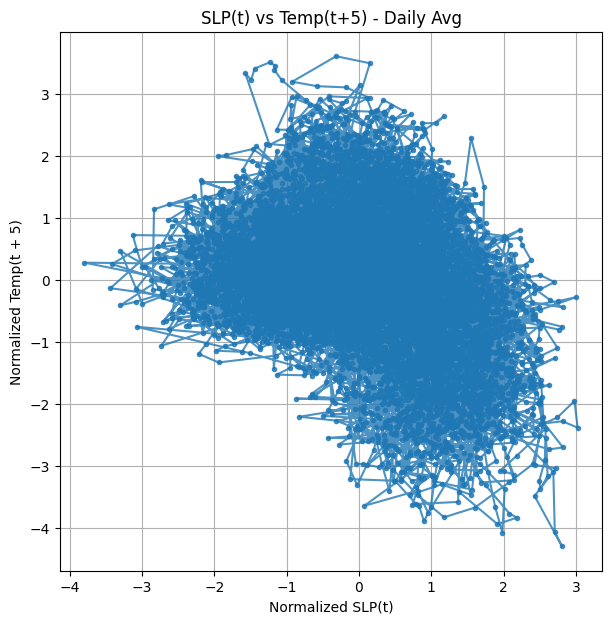

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters:
lag_steps = 5  # You can adjust this (e.g., 1, 3, 5, etc.)

# Temporal scales:
temporal_scales = {
    "Monthly": (
        ds.msl.resample(time="1M").mean().dropna(dim='time'),
        ds_temp.t2m.resample(time="1M").mean().dropna(dim='time')
    ),
    "Weekly": (
        ds.msl.resample(time="1W").mean().dropna(dim='time'),
        ds_temp.t2m.resample(time="1W").mean().dropna(dim='time')
    ),
    "Daily": (
        ds.msl.dropna(dim='time'),
        ds_temp.t2m.dropna(dim='time')
    )
}

# Select specific grid point (e.g., central location) or average:
latitude = 15.0
longitude = 95.0

for scale_name, (scale_data_slp, scale_data_temp) in temporal_scales.items():
    
    # Extract SLP and Temp time series at (lat, lon)
    point_slp = scale_data_slp.sel(latitude=latitude, longitude=longitude, method="nearest").values
    point_temp = scale_data_temp.sel(latitude=latitude, longitude=longitude, method="nearest").values
    
    # Ensure enough length for lag
    valid_len = len(point_slp) - lag_steps
    
    slp_valid = point_slp[:valid_len]
    temp_lagged = point_temp[lag_steps:]  # Lag by desired steps
    
    # Normalize
    slp_norm = (slp_valid - np.mean(slp_valid)) / np.std(slp_valid)
    temp_norm = (temp_lagged - np.mean(temp_lagged)) / np.std(temp_lagged)
    
    # Plot
    plt.figure(figsize=(7,7))
    plt.plot(slp_norm, temp_norm, linestyle='-', marker='.', alpha=0.8)
    plt.xlabel('Normalized SLP(t)')
    plt.ylabel(f'Normalized Temp(t + {lag_steps})')
    plt.title(f'SLP(t) vs Temp(t+{lag_steps}) - {scale_name} Avg')
    plt.grid()
    plt.show()


c:\Users\chint\AppData\Local\Programs\Python\Python312\Lib\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\chint\AppData\Local\Programs\Python\Python312\Lib\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


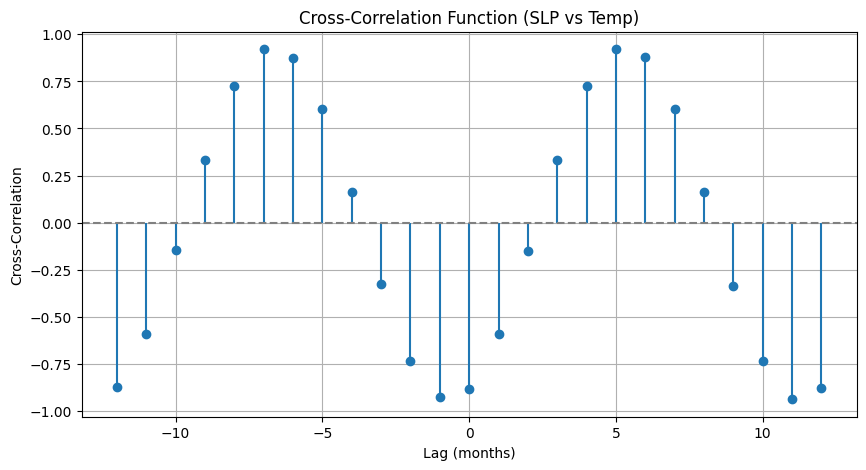

In [8]:
latitude = 30.0
longitude = 130.0

monthly_slp = ds.msl.resample(time="1M").mean().dropna(dim='time')
monthly_temp = ds_temp.t2m.resample(time="1M").mean().dropna(dim='time')

slp_series = monthly_slp.sel(latitude=latitude, longitude=longitude, method="nearest").values
temp_series = monthly_temp.sel(latitude=latitude, longitude=longitude, method="nearest").values

# Normalize
slp_norm = (slp_series - np.mean(slp_series)) / np.std(slp_series)
temp_norm = (temp_series - np.mean(temp_series)) / np.std(temp_series)

# Compute Cross-Correlation Function (CCF)
lags = np.arange(-12, 13)  # Lag from -12 to +12 months
ccf = [np.corrcoef(slp_norm[max(0, lag):len(slp_norm) - max(0, -lag)], 
                   temp_norm[max(0, -lag):len(temp_norm) - max(0, lag)])[0, 1]
       for lag in lags]

# Plot
plt.figure(figsize=(10,5))
plt.stem(lags, ccf, basefmt=" ")
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Lag (months)')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation Function (SLP vs Temp)')
plt.grid(True)
plt.show()